In [147]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [148]:
df = pd.read_csv('Data/_predictive_maintenance.csv')

In [149]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [155]:
df1 = df.drop(columns=['UDI','Failure Type','Type'],axis = 1)
df1.rename(columns={'Product ID':'Machine ID'},inplace=True)
df1['Machine ID'] = 1

df1.head()

,Machine ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Machine ID               10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [157]:
df1.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Machine ID,10000.0,1.00000,0.000000,1.0,1.0,1.0,1.0,1.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [158]:
df1.isnull().sum()

Machine ID                 0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

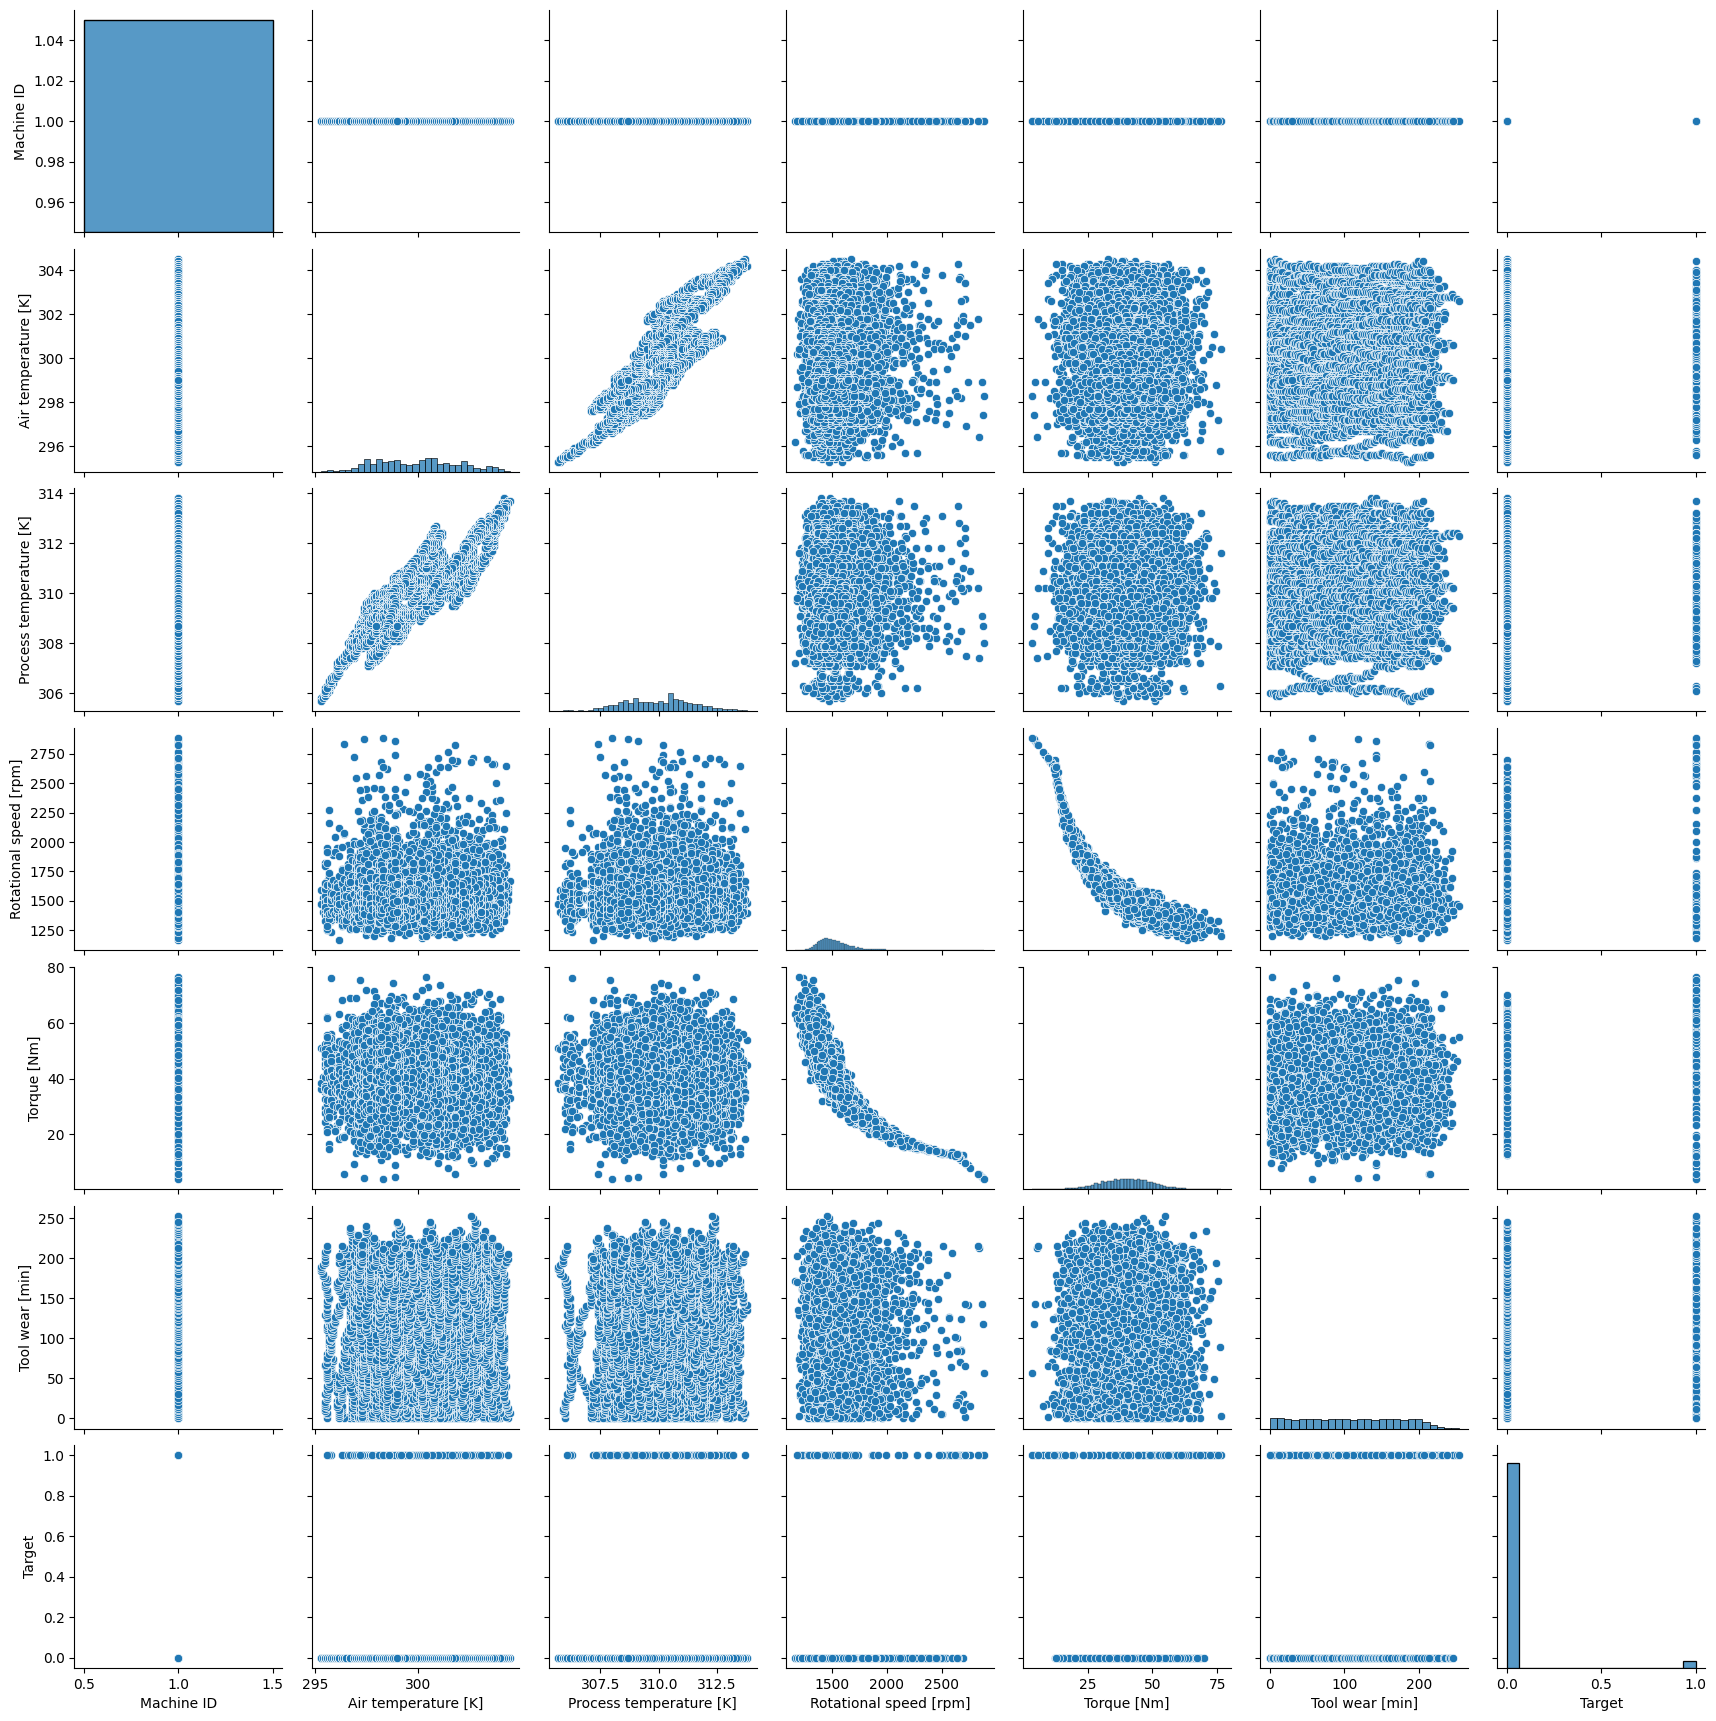

In [159]:
sns.pairplot(df1)
plt.show()

______
Splitting Dataset

In [160]:
y = df1['Target']
X = df1.drop(columns = 'Target', axis=1)
print(y.shape,X.shape)

(10000,) (10000, 6)


In [161]:
y.value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [162]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=789)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.1,random_state=42)

X_train.drop(columns='Machine ID', axis=1, inplace=True)
X_test.drop(columns='Machine ID', axis=1, inplace=True)

       Machine ID  Air temperature [K]  Process temperature [K]  \
12612           1                303.4                    311.7   
11108           1                300.5                    309.9   
6508            1                301.0                    310.1   
13314           1                300.8                    310.1   
1601            1                297.8                    307.8   
...           ...                  ...                      ...   
16370           1                302.2                    310.6   
11237           1                299.5                    308.7   
1048            1                296.5                    307.6   
12168           1                303.0                    311.3   
17891           1                300.8                    310.1   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
12612                    1353         44.1              192  
11108                    1397         45.9              210  
6508     

_______
Creating a simulation kit for practical implementation

In [182]:
simulation_kit = json.dumps(X_val.to_dict(orient='records'))

with open('Data/simulation_kit.json','w') as file:
    file.write(simulation_kit)


In [183]:

print(simulation_kit)

[{"Machine ID": 1, "Air temperature [K]": 303.4, "Process temperature [K]": 311.7, "Rotational speed [rpm]": 1353, "Torque [Nm]": 44.1, "Tool wear [min]": 192}, {"Machine ID": 1, "Air temperature [K]": 300.5, "Process temperature [K]": 309.9, "Rotational speed [rpm]": 1397, "Torque [Nm]": 45.9, "Tool wear [min]": 210}, {"Machine ID": 1, "Air temperature [K]": 301.0, "Process temperature [K]": 310.1, "Rotational speed [rpm]": 1756, "Torque [Nm]": 30.7, "Tool wear [min]": 2}, {"Machine ID": 1, "Air temperature [K]": 300.8, "Process temperature [K]": 310.1, "Rotational speed [rpm]": 1405, "Torque [Nm]": 61.2, "Tool wear [min]": 189}, {"Machine ID": 1, "Air temperature [K]": 297.8, "Process temperature [K]": 307.8, "Rotational speed [rpm]": 1597, "Torque [Nm]": 38.2, "Tool wear [min]": 11}, {"Machine ID": 1, "Air temperature [K]": 301.6, "Process temperature [K]": 310.7, "Rotational speed [rpm]": 1380, "Torque [Nm]": 51.8, "Tool wear [min]": 216}, {"Machine ID": 1, "Air temperature [K]": 3

In [122]:
logistic_regression_model = LogisticRegression(C= 1.0,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)


X_train = X_train.values
X_test = X_test.values
logistic_regression_model.fit(X_train,y_train)
y_pred1 = logistic_regression_model.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8303622771707878
[[2143  438]
 [ 447 2189]]


In [123]:
print(pd.DataFrame({'y_test':y_test,'y_pred1':y_pred1}))

       y_test  y_pred1
11209       1        1
17248       1        1
5739        0        0
11411       1        1
14252       1        1
...       ...      ...
19308       1        1
2875        0        0
7320        0        1
10751       1        0
17520       1        1

[5217 rows x 2 columns]


In [124]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2581
           1       0.83      0.83      0.83      2636

    accuracy                           0.83      5217
   macro avg       0.83      0.83      0.83      5217
weighted avg       0.83      0.83      0.83      5217



In [125]:
import pickle

model_pkl_file = "Models/logistic_regression_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(logistic_regression_model, file)

____
SVM

In [143]:
import numpy as np


row = X_test[0]

row_2 = {
        "Air temperature [K]": 301.0,
        "Process temperature [K]": 310.1,
        "Rotational speed [rpm]": 1756,
        "Torque [Nm]": 30.7,
        "Tool wear [min]": 2
    }

row = row.reshape(1,-1)
print(row)


row_2 = np.array(list(row_2.values())).reshape(1,-1)
print(row_2)


y_pred1 = logistic_regression_model.predict_proba(row)
print(y_pred1)

[[ 301.9  310.4 1286.    62.8   22. ]]
[[ 301.   310.1 1756.    30.7    2. ]]
[[0.14876304 0.85123696]]
